In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Reshape

In [2]:
(x_train, _),(x_test, _) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
x_train = x_train / 255.
x_test = x_test / 255.

In [4]:
x_train.shape

(60000, 28, 28)

In [21]:
latent_dim = 64
class AutoEncoder(Model):
  def __init__(self, latent_dim):
    super(AutoEncoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
                                        Flatten(),
                                        Dense(latent_dim, activation="relu")
    ])

    self.decoder = tf.keras.Sequential([
                                        Dense(784, activation="sigmoid"),
                                        Reshape((28,28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [22]:
autoEncoder = AutoEncoder(latent_dim)

In [23]:
autoEncoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [24]:
autoEncoder.fit(x_train, x_train, epochs=1, shuffle=True, validation_data=(x_test, x_test))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0239 - val_loss: 0.0132


In [25]:
import matplotlib.pyplot as plt

In [26]:
encoded_images = autoEncoder.encoder(x_test).numpy()
decoded_images = autoEncoder.decoder(encoded_images).numpy()

In [27]:
# decoded_images[0]

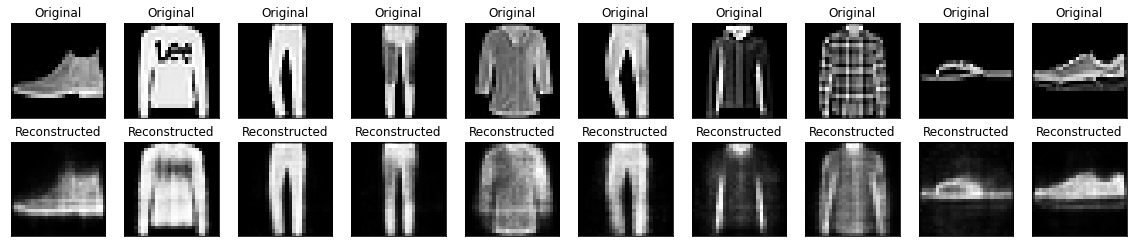

In [28]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.title("Original")
  plt.imshow(x_test[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.title("Reconstructed")
  plt.imshow(decoded_images[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()